## VISUAL DS

1.sns.set() - установит настройки (set_theme - настройки по умолчснию matplotlib?)  
2.%config InlineBackend.figur_format = 'retina' - в ретине лучше графики? (у меня везде одинаково)

## Одномерная визуализация
### Простые графики (гистограммы, боксплот, столбчатые)  

featers = ["total day minutes", "total intl calls"] - сначала указываем стлб, по которым будем строить  
гистограммы (можно по всем)  
3.df[featers].hist() - гистограмма столбцов, указанных в featers
df[featers].hist(figsize=(15, 4)) - Добавим для улучшения figsize. Первая за ширину, вторая за высоту  
4.df[featers].plot(kind = 'density') - Рисуем график плотности (сглаженная гистограмма)    
df[featers].plot(kind = 'density', subplots = True) - Разделяем на два, по featers  
df[featers].plot(kind = 'density', subplots = True, layout=(1, 3)); (тчк с зпт - не будет текста, сразу график)  
Перемещаем в одну строчку - рядом друг с другом  
Внимательно к количеству графиков, должно совпадать с кол-вом значений, у нас с featers (см.смену вариантов)  
df[featers].plot(kind = 'density', subplots = True, layout=(1, 3), sharex = False)  
Делаем для разных графиков свой масштаб  
df[featers].plot(kind = 'density', subplots = True, layout=(1, 3), sharex = False, figsize=(15, 4))  
Перемещаем в одну строчку - рядом друг с другом   
5.Можно посмотреть распределение с помощью снс + здесь будет плотность ядра KDE  
Высота столбцов нормирована и показывает плотность, а не кол-во примеров в ячейке.  
sns.distplot(df["total intl calls"]);  
Здесь не могу посмотреть несколько параметров, только по одному  
6.Бокс-плот с снс  
sns.boxplot(x = "total intl calls", data = df)  
Так тоже можно, как вариант  
sns.boxplot(data = df["total intl calls"]);  
7.Тоже самое + плотность ядра на красивом виолончельном графике  
sns.violinplot(x = "total intl calls", data = df);  
8.Соединим два графика рядом для сравнения, одинаковы, но так не очень красиво  
sns.boxplot(data = df["total intl calls"])  
sns.violinplot(data = df["total intl calls"]);  
9.Так разъединяем, но не понятно???  
_, axes = plt.subplots(1, 2, sharey = True, figsize=(15, 5))  
sns.boxplot(data = df["total intl calls"], ax = axes[0])  
sns.violinplot(data = df["total intl calls"], ax = axes[1]);

## Многомерная визуализация
### Количественные и количественные
Удаляем нечисловые колонки, числовые собираем в список numerical  
numerical = list(  
    set(df.columns) - {"state", "international plan", "voice mail plan", "area code", "churn", "customer service calls"}  
)    
10.Строим матрицу корреляции  
corr_matrix = df[numerical].corr()  
sns.heatmap(corr_matrix);  
Удаляем зависимые переменные (те, которые были расчитаны из уже имеющихся)  
numerical = list(  
    set(numerical) - {'total day charge', 'total intl charge', 'total eve charge', 'total night charge',}  
)  
Проверяем повторно,  
corr_matrix = df[numerical].corr()    
sns.heatmap(corr_matrix)  
11.Диаграмма рассеивания с помощью матплотлиб  
plt.scatter(df['total day minutes'], df['total night minutes']);  
Как вариант, с снс, еще и гистограммы видим  
sns.jointplot(x = 'total day minutes', y = 'total night minutes', data = df, kind = 'scatter');  
12.sns.jointplot(x = 'total day minutes', y = 'total night minutes', data = df, kind = 'kde', color = 'r');    
Сглаженная диаграмма рассеивания красного цвета  
13.Матрица рассеивания иногда полезна, здесь нет, может строится долго  
Сначала исправим представление  
%config InlineBackend.figur_format = 'png'  
sns.pairplot(df[numerical]);  

### Количественные и категориальные
14.plt.scatter(x = 'total day minutes', y = 'total night minutes', data = df, c = 'churn', s = 7)  
Можно добавить категориальный признак в скаттер (но не очень понятно как цвет поменять)  
15.sns.lmplot('total day minutes', 'total night minutes', data = df, hue = 'churn', fit_reg = False);  
Так получается хорошая диаграмма рассеянея с категориальным признаком по цвету.  
16.Строим боксплоты для нумерикал  
fig, axes = plt.subplots(nrows = 3 , ncols = 4 , figsize = (10, 7))  
for idx, feat in enumerate(numerical):  
    ax = axes[int(idx / 4), idx % 4]  
    sns.boxplot(x = 'churn', y = feat, data = df, ax = ax)  
    ax.set_xlabel("")  
    ax.set_ylabel(feat)  
fig.tight_layout()  
17.По боксплотам видим те, которые надо бы рассмотреть более подробно, строим по ним отдельные с категориями:  
_, axes = plt.subplots(1, 2, sharey = True, figsize=(10, 4))  
sns.boxplot(x = "churn", y = "total day minutes", data = df, ax = axes[0])  
sns.violinplot(x = "churn", y = "total day minutes", data = df, ax = axes[1]);
#### Количественный признак от двух категориальных
18.CATPLOT() - Можно смотреть один количественный и два категориальных, разбивая одну категорию на разные графики   
sns.catplot(x = 'churn', y = 'total day minutes', col = 'customer service calls',  
            data = df[df["customer service calls"] < 8], kind = "box", col_wrap = 4,  
            height = 4, aspect = 0.8,);  
col - колонка, kind - разные виды графиков, кол-во колонок на листе, высота, ширина.  

### Категориальный против категориального

19.sns.countplot(x = 'customer service calls', hue = 'churn', data = df); Рисуем график ПОДСЧЕТА + категория  
20.Смотрим отток и бинарные ф-ии (межд план и план голос почты)  
_, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 4)) эта строка собирает несколько графиков - axes(не оси, графики)  
sns.countplot(x = 'international plan', hue = 'churn', data = df, ax = axes[0])  
sns.countplot(x = 'voice mail plan', hue = 'churn', data = df, ax = axes[1]);  
21.КРОССТАБЛИЦА, например посчитаем и посмотрим отток по штатам  
pd.crosstable(df['state'], df['churn']).T (.T - перевернет из вертикали в горизонталь)  
22.df.groupby(["state"])["churn"].agg([np.mean]).sort_values(by = "mean", ascending = False).T  
Кэф оттока от больш к меньш   
Не принимаем во внимание, мало данных, надо больше выборок!  

## Визуализация всего набора данных

### Наивный подход
Можно использовать гистограммы или диаграммы рассеивания на все данные, но это даст связи по двум переменным, а если хочется сразу все взаимодействия со всеми?

### Уменьшение размерности
Например, PCA, будет далее (это обучение без учителя, линейный метод)

### t-SNE
Нелинейный метод (многообразное обучение) t-distributed Stochastic Neighbor Embedding  
Смысл: найти проекцию многомерного пространства такую, чтобы расстояние м-ду точками на этой проекции отображали расстояния в пространстве (т.е. м-ду далекими в пр-ве точками большое расстояние на проекции и наоборот)  
  
from sklearn.manifold import TSNE  
from sklearn.preprocessing import StadartScaller  
  
Сложная часть!!! Лучше смотреть реализацию или урок!  
Редко применима, больше похожа на угадывание + сверхресурсозатратна!






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Настройки представления графиков
sns.set()

In [3]:
#Настройки графики дисплея на ретину?
%config InlineBackend.figur_format = 'retina'

In [4]:
df = pd.read_csv("telecom_churn.csv")

In [5]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Простые графики (гистограммы, боксплот, столбчатые)

In [7]:
#1-й вариант с двумя значениями
featers = ["total day minutes", "total intl calls"] 
#Сделаем список для значений, по которым хотим построить график

In [8]:
#2-й вариант с тремя
featers = ["total day minutes", "total night minutes", "total intl calls"] 
#Сделаем список для значений, по которым хотим построить график

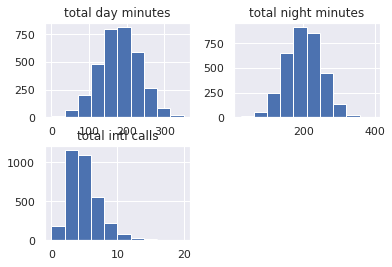

In [9]:
df[featers].hist();#Строим гистограммы по раннее созданному списку значений столбцов

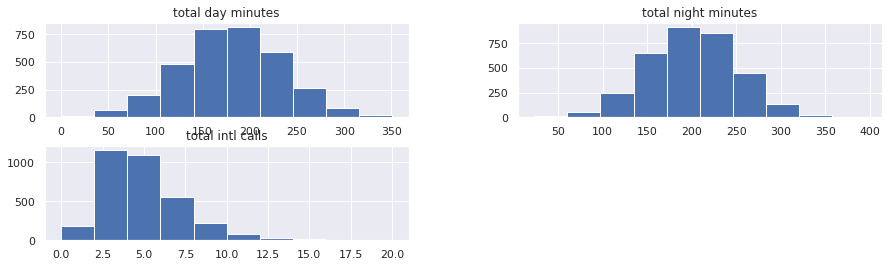

In [10]:
df[featers].hist(figsize=(15, 4)); #Добавим для улучшения figsize. Первая за ширину, вторая за высоту

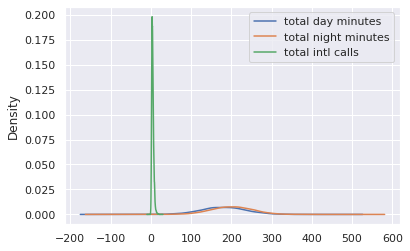

In [11]:
df[featers].plot(kind = 'density');
#Рbсуем график плотности (сглаженная гистограмма). 

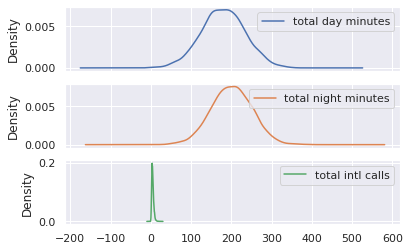

In [12]:
df[featers].plot(kind = 'density', subplots = True);
#Разделяем на два, по featers. 

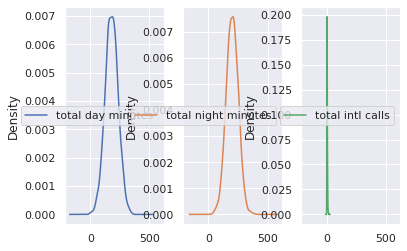

In [13]:
df[featers].plot(kind = 'density', subplots = True, layout=(1, 3));
#Перемещаем в одну строчку - рядом друг с другом. 
#Внимательно к количеству графиков, должно совпадать с кол-вом значений, у нас с featers (см.смену вариантов)

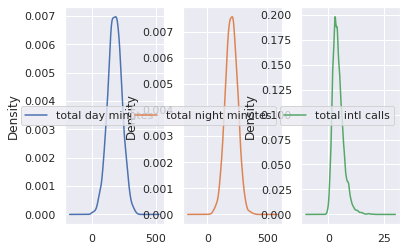

In [14]:
df[featers].plot(kind = 'density', subplots = True, layout=(1, 3), sharex = False);
#Делаем для разных графиков свой масштаб. 

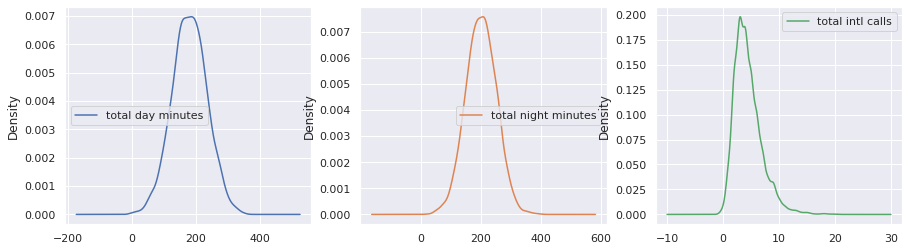

In [15]:
df[featers].plot(kind = 'density', subplots = True, layout=(1, 3), sharex = False, figsize=(15, 4));
#Перемещаем в одну строчку - рядом друг с другом. 

/home/anton/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


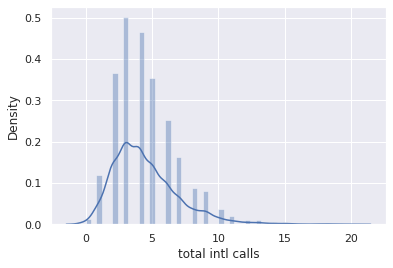

In [16]:
#Можно посмотреть распределение с помощью снс + здесь будет плотность ядра KDE
#Высота столбцов нормирована и показывает плотность, а не кол-во примеров в ячейке.
sns.distplot(df["total intl calls"]);
#Здесь не могу посмотреть несколько параметров, только по одному. 

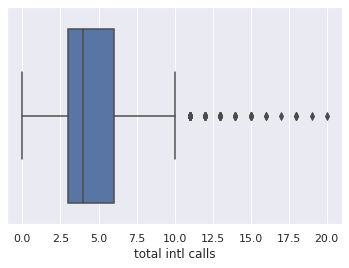

In [17]:
#Бокс-плот с снс
sns.boxplot(x = "total intl calls", data = df);

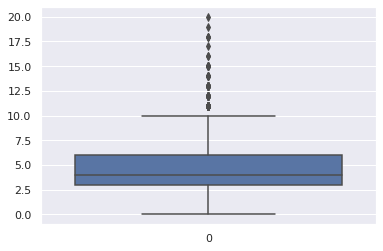

In [18]:
#Бокс-плот с снс. Так тоже можно, как вариант
sns.boxplot(data = df["total intl calls"]);

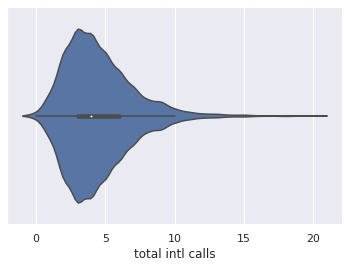

In [19]:
#Тоже самое + плотность ядра на красивом виолончельном графике
sns.violinplot(x = "total intl calls", data = df);

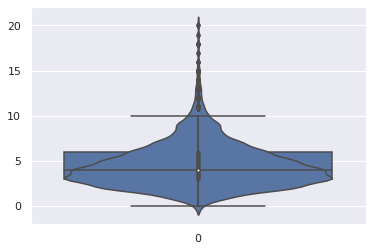

In [20]:
#Соединим два графика рядом для сравнения, одинаковы, но так не очень красиво
sns.boxplot(data = df["total intl calls"])
sns.violinplot(data = df["total intl calls"]);

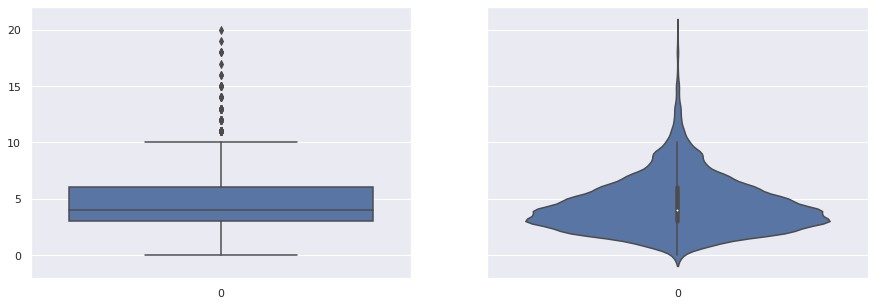

In [21]:
#Так разъединяем, но не понятно???
_, axes = plt.subplots(1, 2, sharey = True, figsize=(15, 5))
sns.boxplot(data = df["total intl calls"], ax = axes[0])
sns.violinplot(data = df["total intl calls"], ax = axes[1]);

In [22]:
#Понятно, что можно числовую статистику присоединить методом describe
df[featers].describe()

,total day minutes,total night minutes,total intl calls
count,3333.000000,3333.000000,3333.000000
mean,179.775098,200.872037,4.479448
std,54.467389,50.573847,2.461214
min,0.000000,23.200000,0.000000
25%,143.700000,167.000000,3.000000
50%,179.400000,201.200000,4.000000
75%,216.400000,235.300000,6.000000
max,350.800000,395.000000,20.000000


# Многомерная визуализация

## Количественные и количественные

In [47]:
#Удаляем нечисловые колонки
numerical = list(
    set(df.columns) - {
        "state",
        "international plan",
        "voice mail plan",
        "area code",
        "churn",
        "customer service calls",
    }
)

In [24]:
numerical

['number vmail messages',
 'total eve charge',
 'total night charge',
 'total night minutes',
 'total day calls',
 'total day charge',
 'account length',
 'total eve minutes',
 'total intl minutes',
 'total intl charge',
 'total intl calls',
 'total eve calls',
 'total day minutes',
 'phone number',
 'total night calls']

In [25]:
corr_matrix = df[numerical].corr()

In [26]:
corr_matrix

,number vmail messages,total eve charge,total night charge,total night minutes,total day calls,total day charge,account length,total eve minutes,total intl minutes,total intl charge,total intl calls,total eve calls,total day minutes,total night calls
number vmail messages,1.000000,0.017578,0.007663,0.007681,-0.009548,0.000776,-0.004628,0.017562,0.002856,0.002884,0.013957,-0.005864,0.000778,0.007123
total eve charge,0.017578,1.000000,-0.012601,-0.012592,-0.021449,0.007036,-0.006745,1.000000,-0.011043,-0.011074,0.002541,-0.011423,0.007029,0.007596
total night charge,0.007663,-0.012601,1.000000,0.999999,0.022927,0.004301,-0.008960,-0.012593,-0.015214,-0.015186,-0.012329,-0.002056,0.004300,0.011188
total night minutes,0.007681,-0.012592,0.999999,1.000000,0.022938,0.004324,-0.008955,-0.012584,-0.015207,-0.015180,-0.012353,-0.002093,0.004323,0.011204
total day calls,-0.009548,-0.021449,0.022927,0.022938,1.000000,0.006753,0.038470,-0.021451,0.021565,0.021666,0.004574,0.006462,0.006750,-0.019557
total day charge,0.000776,0.007036,0.004301,0.004324,0.006753,1.000000,0.006214,0.007050,-0.010157,-0.010094,0.008032,0.015769,1.000000,0.022972
account length,-0.004628,-0.006745,-0.008960,-0.008955,0.038470,0.006214,1.000000,-0.006757,0.009514,0.009546,0.020661,0.019260,0.006216,-0.013176
total eve minutes,0.017562,1.000000,-0.012593,-0.012584,-0.021451,0.007050,-0.006757,1.000000,-0.011035,-0.011067,0.002541,-0.011430,0.007043,0.007586
total intl minutes,0.002856,-0.011043,-0.015214,-0.015207,0.021565,-0.010157,0.009514,-0.011035,1.000000,0.999993,0.032304,0.008703,-0.010155,-0.013605
total intl charge,0.002884,-0.011074,-0.015186,-0.015180,0.021666,-0.010094,0.009546,-0.011067,0.999993,1.000000,0.032372,0.008674,-0.010092,-0.013630


In [48]:
df[numerical].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_136079/3130744954.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df[numerical].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,number vmail messages,total eve charge,total night charge,total night minutes,total day calls,total day charge,account length,total eve minutes,total intl minutes,total intl charge,total intl calls,total eve calls,total day minutes,total night calls
number vmail messages,1.00,0.02,0.01,0.01,-0.01,0.00,-0.00,0.02,0.00,0.00,0.01,-0.01,0.00,0.01
total eve charge,0.02,1.00,-0.01,-0.01,-0.02,0.01,-0.01,1.00,-0.01,-0.01,0.00,-0.01,0.01,0.01
total night charge,0.01,-0.01,1.00,1.00,0.02,0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,0.00,0.01
total night minutes,0.01,-0.01,1.00,1.00,0.02,0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,0.00,0.01
total day calls,-0.01,-0.02,0.02,0.02,1.00,0.01,0.04,-0.02,0.02,0.02,0.00,0.01,0.01,-0.02
total day charge,0.00,0.01,0.00,0.00,0.01,1.00,0.01,0.01,-0.01,-0.01,0.01,0.02,1.00,0.02
account length,-0.00,-0.01,-0.01,-0.01,0.04,0.01,1.00,-0.01,0.01,0.01,0.02,0.02,0.01,-0.01
total eve minutes,0.02,1.00,-0.01,-0.01,-0.02,0.01,-0.01,1.00,-0.01,-0.01,0.00,-0.01,0.01,0.01
total intl minutes,0.00,-0.01,-0.02,-0.02,0.02,-0.01,0.01,-0.01,1.00,1.00,0.03,0.01,-0.01,-0.01
total intl charge,0.00,-0.01,-0.02,-0.02,0.02,-0.01,0.01,-0.01,1.00,1.00,0.03,0.01,-0.01,-0.01


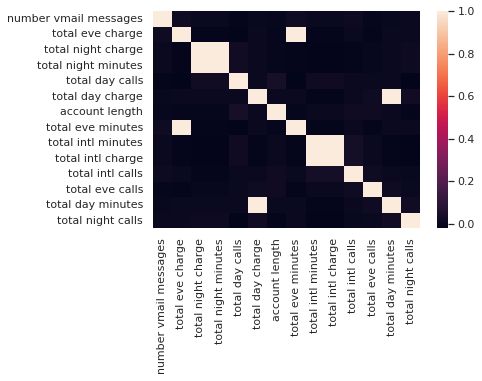

In [27]:
sns.heatmap(corr_matrix);

In [28]:
#Белые квадраты кроме диагонали указывают на значения расчитанные из других значений, убираем их
numerical = list(
    set(numerical) - {
    'total day charge',
    'total intl charge',
    'total eve charge',
    'total night charge',    
    }
)

In [29]:
numerical

['number vmail messages',
 'total night minutes',
 'total day calls',
 'account length',
 'total eve minutes',
 'total intl minutes',
 'total intl calls',
 'total eve calls',
 'total day minutes',
 'phone number',
 'total night calls']

In [30]:
corr_matrix = df[numerical].corr()

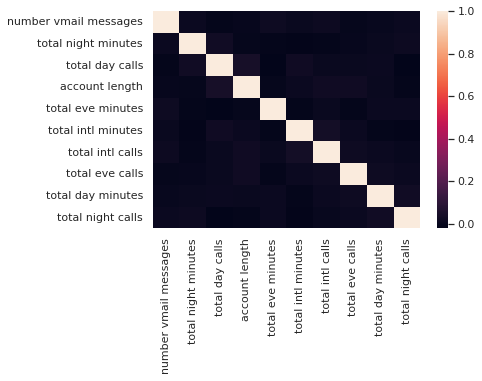

In [31]:
sns.heatmap(corr_matrix);#Так понимаю, хорошая матрица корреляции

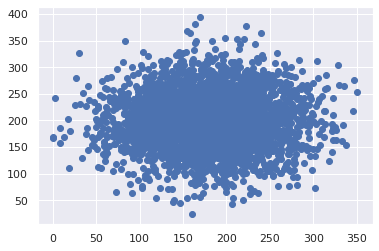

In [32]:
#Диаграмма рассеяния с помощью матплотлиб
plt.scatter(df['total day minutes'], df['total night minutes']);

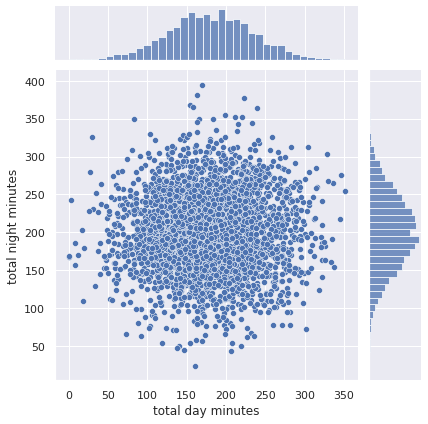

In [33]:
sns.jointplot(x = 'total day minutes', y = 'total night minutes', data = df, kind = 'scatter');
#Как вариант, с снс, еще и гистограммы видим

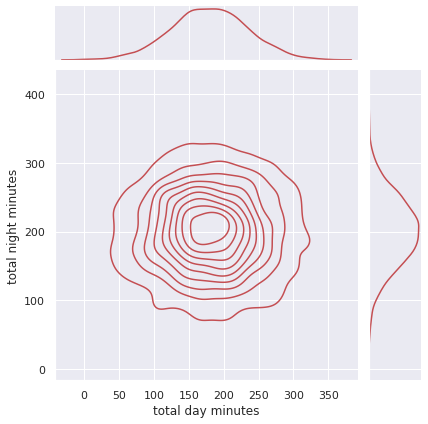

In [34]:
#Сглаженный вариант с снс
sns.jointplot(x = 'total day minutes', y = 'total night minutes', data = df, kind = 'kde', color = 'r');

In [35]:
%config InlineBackend.figur_format = 'png' #Формат для матрицы рассеяния по всем столбцам

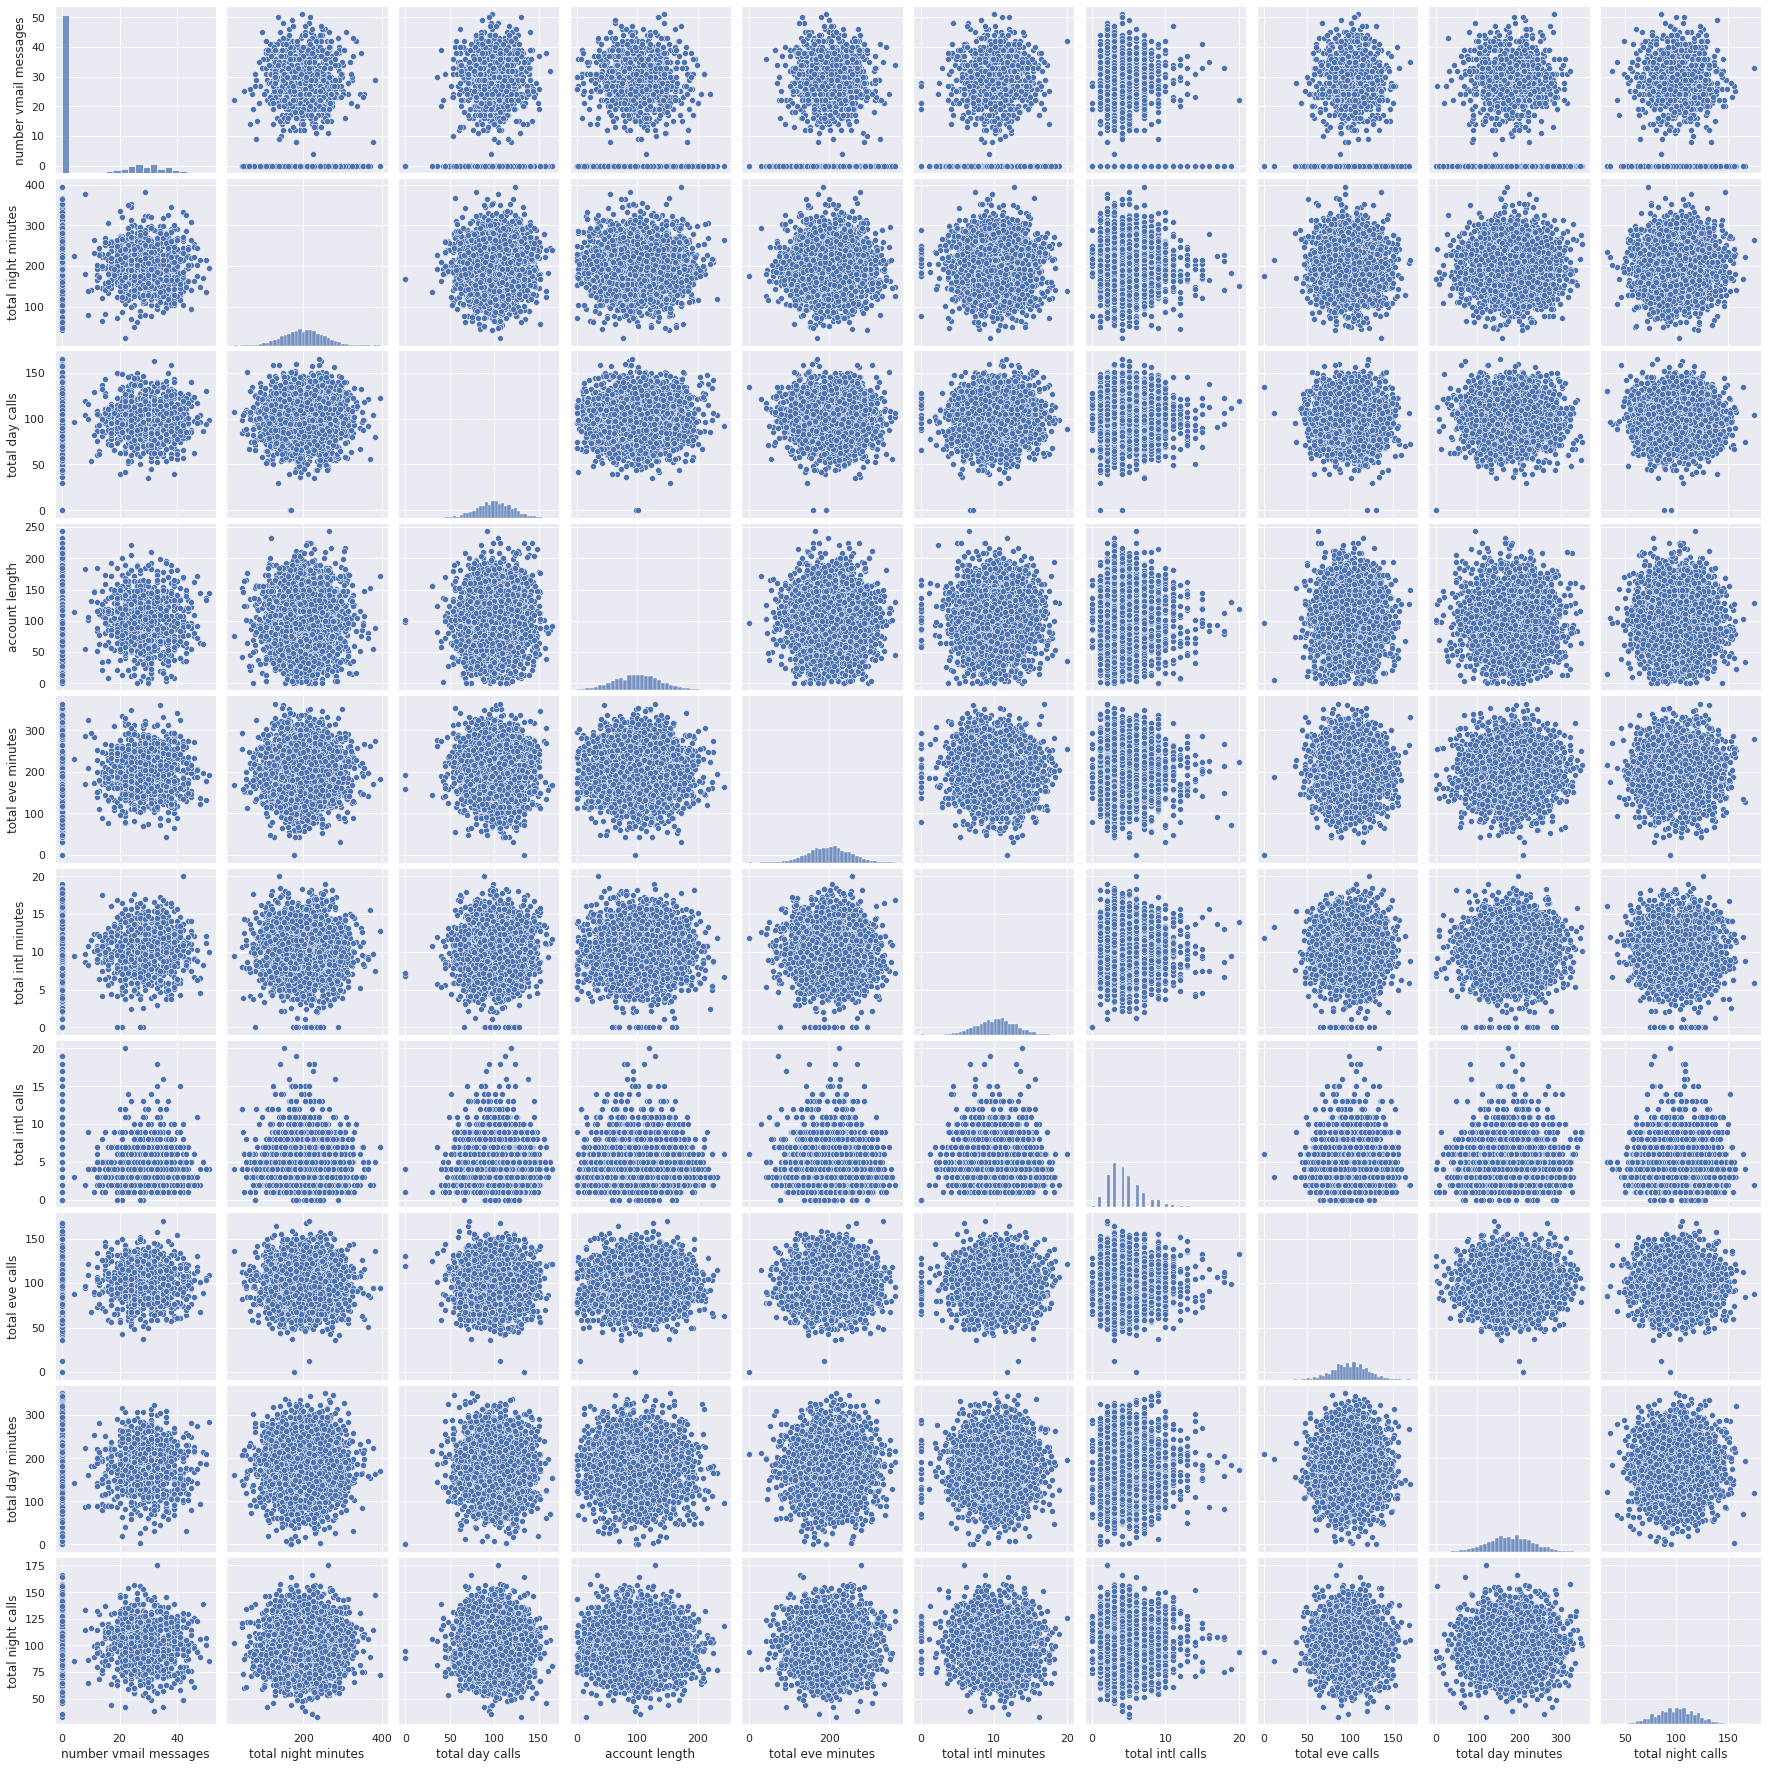

In [36]:
#Постороим матрицу рассеяния по всем столбцам, иногда хорошо, но может строится долго!
sns.pairplot(df[numerical]);

In [37]:
%config InlineBackend.figur_format = 'svg' #Возвращаем нормальное представление графиков

### Количественные и категориальные

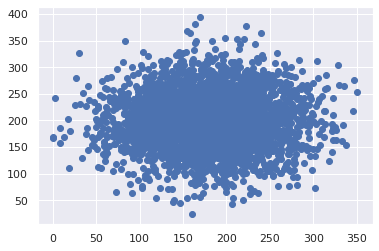

In [38]:
plt.scatter(df['total day minutes'], df['total night minutes']); 
#Можно добавить категориальный признак в скаттер, но не очень понятно, как правильно и что делается

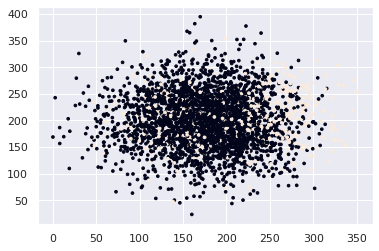

In [39]:
plt.scatter(x = 'total day minutes', y = 'total night minutes', data = df, c = 'churn', s = 7); 
#Вот так можно, но, пока не понятно как цвет изменить, надо что то с "churn" делать, а так 0 и 1 будут бел и черн.
# s - размер точек

/home/anton/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


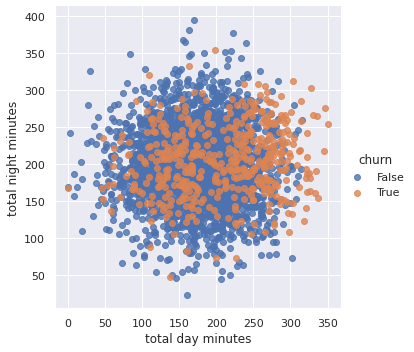

In [40]:
sns.lmplot('total day minutes', 'total night minutes', data = df, hue = 'churn', fit_reg = False);
#Нарисует раскрасив по цвету, в зависимости от категории в churn
#Для чего fit_reg? Рисует линии (среднее?)

/home/anton/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


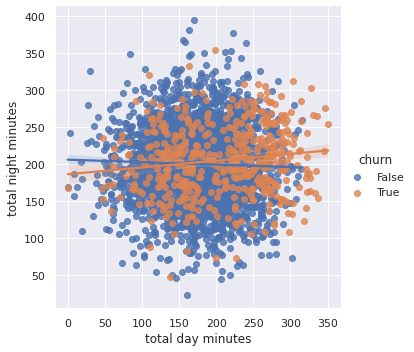

In [41]:
sns.lmplot('total day minutes', 'total night minutes', data = df, hue = 'churn');


In [42]:
#Иногда можно исследовать категориальные переменные от категориальных вместе с количественными. Добавим:
numerical.append('customer service calls')

In [43]:
numerical

['number vmail messages',
 'total night minutes',
 'total day calls',
 'account length',
 'total eve minutes',
 'total intl minutes',
 'total intl calls',
 'total eve calls',
 'total day minutes',
 'phone number',
 'total night calls',
 'customer service calls']

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

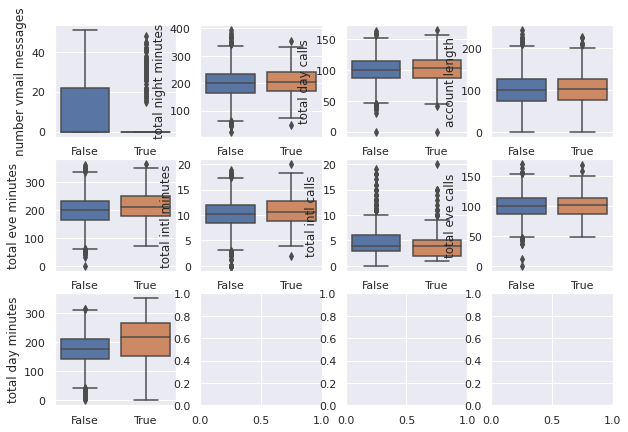

In [44]:
# Построились но почему то не все!!!!!!!!!!!
#Строим боксплоты для нумерикал
fig, axes = plt.subplots(nrows = 3 , ncols = 4 , figsize = (10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x = 'churn', y = feat, data = df, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [ ]:
#Видим, что надо смотреть где большие расхождения, дневн минуты и звонки в поддержку.
#Отдельно строим, например, по дневным минутам, чтобы рассмотреть лучше.
_, axes = plt.subplots(1, 2, sharey = True, figsize=(10, 4))
sns.boxplot(x = "churn", y = "total day minutes", data = df, ax = axes[0])
sns.violinplot(x = "churn", y = "total day minutes", data = df, ax = axes[1]);

In [ ]:
# CATPLOT()Можно смотреть один количественный и два категориальных, разбивая одну категорию на разные графики
sns.catplot(x = 'churn', y = 'total day minutes', col = 'customer service calls',
            data = df[df["customer service calls"] < 8], kind = "box", col_wrap = 4,
            height = 4, aspect = 0.8,);
#col - колонка, kind - разные виды графиков, кол-во колонок на листе, высота, ширина.

Видно, что при более чем 3 звонках в сервисную службу, количество минут в день перестает быть основным фактором ухода.

### Категориальный против категориального

In [ ]:
sns.countplot(x = 'customer service calls', hue = 'churn', data = df);
#Видно, что при 4 и более звонках кол-во ушедших резко возрастает (по сранению с лояльными)

In [ ]:
#Смотрим отток и бинарные ф-ии (межд план и план голос почты)
_, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 4))
sns.countplot(x = 'international plan', hue = 'churn', data = df, ax = axes[0])
sns.countplot(x = 'voice mail plan', hue = 'churn', data = df, ax = axes[1]);
#Понятно, что при вкл. межд плана сильно возрастает отток. 

In [ ]:
sns.countplot(x = 'international plan', hue = 'churn', data = df); #plt.subplots - собирает несколько графиков, matplotlib!

#### Кросс-таблица. Зависимость одной катег переменной от другой категориальной

In [ ]:
pd.crosstab(df['state'], df['churn']).T #.T переворачивает в горизонталь

In [ ]:
df.groupby(["state"])["churn"].agg([np.mean]).sort_values(by = "mean", ascending = False).T #Кэф оттока от больш к меньш

## Визуализация всего набора данных
### t-SNE

In [ ]:
#Удалим столбцы churn & 
df1 = df.drop(['churn', 'state'], axis = 1)

In [ ]:
#Изменим значения на числовые в столюцах voice mail plan & internationsl plan
df1['voice mail plan'] = df1['voice mail plan'].map({'yes':1, 'no':0})
df1['international plan'] = df1['international plan'].map({'yes':1, "no":0})

In [ ]:
df1.fillna(..., inplace = True) #Так можно убрать все Nan из DF

In [ ]:
X = df1

In [ ]:
Y = X.drop(['phone number'], axis = 1) 
#В уроке не удаляется, но, предположительно наличие тире не дает преобразовать, т.к. это не числовой формат!!!!!!!

In [ ]:
#Добавляем модули для ТСНЕ и для Z-преобразования к стандартной шкале всех колонок
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
#Преобразуем к стандартной шкале (чтобы масштаб был одинаков у всех измерений, см.Z-преобразование в статистике)
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [ ]:
%%time #Покажет время выполнения
tsne = TSNE(random_state = 17)
tsne_repr = tsne.fit_transform(Y_scaled)

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha = 0.5);

In [ ]:
#Раскрасим по churn
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c = df['churn'].map({False:'blue', True:'orange'}), alpha = 0.5);

In [ ]:
#Разделим на два графика - по интерн плану и по голосов плану.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["international plan", "voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"yes": "orange", "no": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);